In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, average_precision_score

import NRLMF

In [2]:
rna_sim=pd.read_csv('rna_similarity.txt',sep='\t')
prot_sim=pd.read_csv('prot_similarity.txt',sep='\t')
inter=pd.read_csv('list_of_interactions.txt',sep='\t')

rna_cnt=inter['RNA_ID'].unique().shape[0] # m
prot_cnt=inter['PROT_ID'].unique().shape[0] # n

Sl=np.empty((rna_cnt,rna_cnt))
Sp=np.empty((prot_cnt,prot_cnt))

for i in rna_sim.index:
    Sl[rna_sim['RNA(i)'][i]][rna_sim['RNA(j)'][i]]=rna_sim['Sim(i,j)'][i]

for i in prot_sim.index:
    Sp[prot_sim['PROT(i)'][i]][prot_sim['PROT(j)'][i]]=prot_sim['Sim(i,j)'][i]

Y=np.zeros((rna_cnt,prot_cnt))
for i in inter.index:
    Y[inter['RNA_ID'][i]][inter['PROT_ID'][i]]=1


In [3]:
# # run once
# random_grouping=np.random.choice(prot_cnt,size=prot_cnt,replace=False)
# random_grouping=np.reshape(random_grouping,(16,np.int64(prot_cnt/16)))
# print(random_grouping)
# np.savetxt('NRLMF_CVS2.txt',random_grouping,fmt='%1d')
random_grouping=np.loadtxt('NRLMF_CVS2.txt',dtype=np.int64)
print(random_grouping)

[[34  6 13 54]
 [16 31 46 53]
 [21 38 60 33]
 [ 2 14 26 35]
 [59 52 42 63]
 [ 7  4 32 22]
 [10 39 44 43]
 [25 36 12 48]
 [62 29 27 20]
 [ 3 50  5 41]
 [45 61 11 47]
 [24 40 28 17]
 [ 8  0 19 49]
 [18  9 23 55]
 [51  1 57 15]
 [30 56 58 37]]


In [4]:
tpr_arr=[]
fpr_arr=[]
pre_arr=[]

def update_metrics(y_true,y_pred,tpr_arr,fpr_arr,pre_arr,ds_no):
    data ={'isTrue': y_true, 'Prob': y_pred}
    df=pd.DataFrame(data)
    df.sort_values(by=['Prob'],ascending=False,inplace=True)
    pos=len([i for i in range(len(y_true)) if y_true[i]==True])
    fal=len(y_true)-pos
    thresholds = np.linspace(0,1,500)
    tpr=[]
    fpr=[]
    pre=[]
    for th in thresholds:
        tp=0
        fp=0
        for i in df.index:
            if df['Prob'][i]<th:
                break
            if df['isTrue'][i]==1:
                tp+=1
            else:
                fp+=1
        tpr.append(tp/pos)
        fpr.append(fp/fal)
        if tp+fp!=0:
            pre.append(tp/(tp+fp))
        else:
            pre.append(1)
    tpr_arr.append(tpr)
    fpr_arr.append(fpr)
    pre_arr.append(pre)
    

+++ CVS-2: Dataset-0 +++
Negative protein set=
[34, 6, 13, 54]
Iteration count=7578
AUROC=0.3943744560515146
AUPR=0.10879344184776682
+++ CVS-2: Dataset-1 +++
Negative protein set=
[16, 31, 46, 53]
Iteration count=8733
AUROC=0.8174043213613499
AUPR=0.26656696269352
+++ CVS-2: Dataset-2 +++
Negative protein set=
[21, 38, 60, 33]
Iteration count=7700
AUROC=0.9317217981340118
AUPR=0.16480753187311284
+++ CVS-2: Dataset-3 +++
Negative protein set=
[2, 14, 26, 35]
Iteration count=8325
AUROC=0.7017439230288318
AUPR=0.20710966103647782
+++ CVS-2: Dataset-4 +++
Negative protein set=
[59, 52, 42, 63]
Iteration count=8951
AUROC=0.8302727119216481
AUPR=0.13681626592720655
+++ CVS-2: Dataset-5 +++
Negative protein set=
[7, 4, 32, 22]
Iteration count=7884
AUROC=0.42377532133015106
AUPR=0.26794040406973596
+++ CVS-2: Dataset-6 +++
Negative protein set=
[10, 39, 44, 43]
Iteration count=8588
AUROC=0.751008719326554
AUPR=0.09382022010958256
+++ CVS-2: Dataset-7 +++
Negative protein set=
[25, 36, 12, 48

/home/rounak/Documents/jupyter/environment/lib/python3.8/site-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


AUROC=0.7310815566630026
AUPR=0.08226797163617039
+++ CVS-2: Dataset-11 +++
Negative protein set=
[24, 40, 28, 17]
Iteration count=9406
AUROC=0.6166718248726174
AUPR=0.08126634546875909
+++ CVS-2: Dataset-12 +++
Negative protein set=
[8, 0, 19, 49]
Iteration count=8657
AUROC=0.6635623564925577
AUPR=0.10060344552373236
+++ CVS-2: Dataset-13 +++
Negative protein set=
[18, 9, 23, 55]
Iteration count=8059
AUROC=0.7017151675485009
AUPR=0.14251797500795346
+++ CVS-2: Dataset-14 +++
Negative protein set=
[51, 1, 57, 15]
Iteration count=8568
AUROC=0.5151410481418324
AUPR=0.2428367232560794
+++ CVS-2: Dataset-15 +++
Negative protein set=
[30, 56, 58, 37]
Iteration count=8084
AUROC=0.8295886889460155
AUPR=0.21944047195088892
Average AUROC=0.684584689373465
Average AUPR=0.1485742961852712


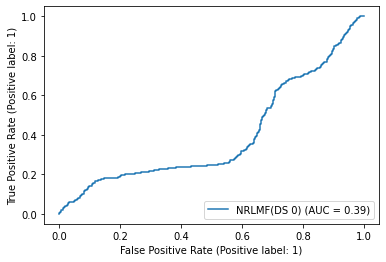

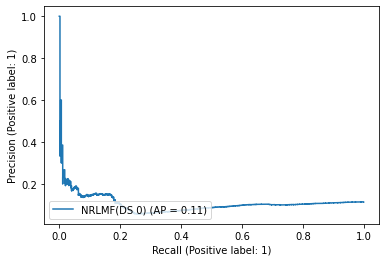

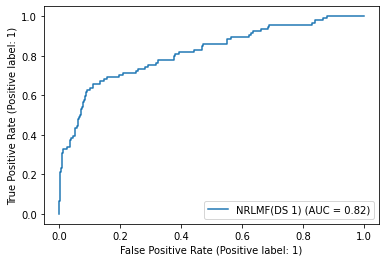

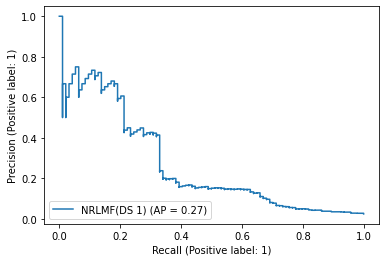

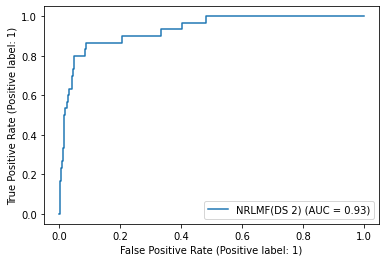

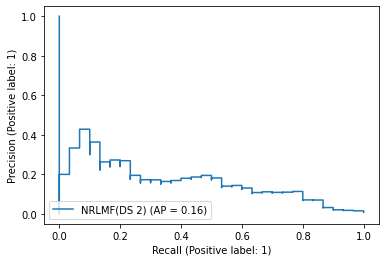

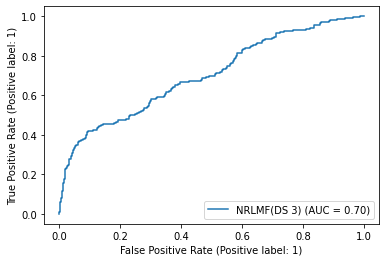

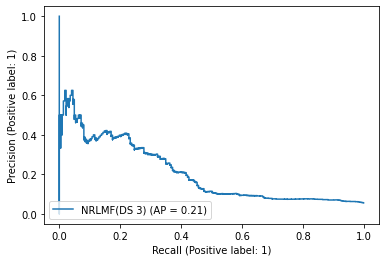

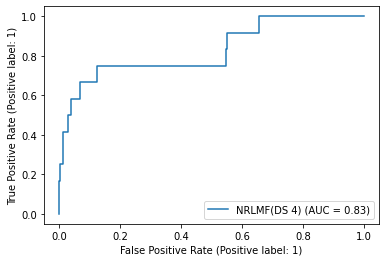

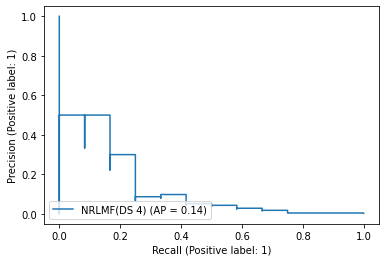

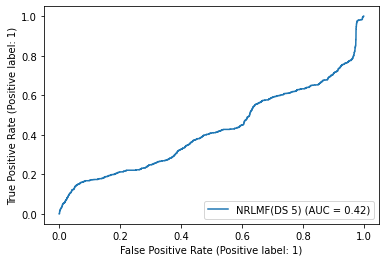

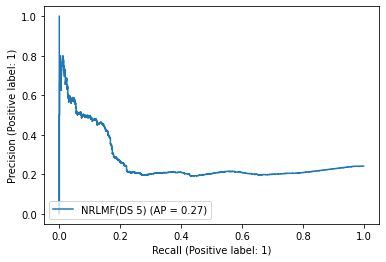

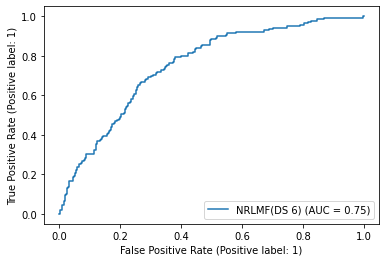

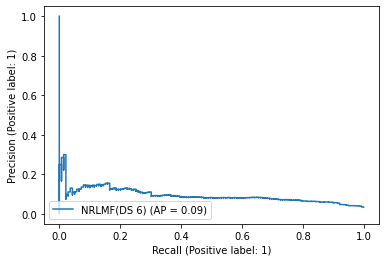

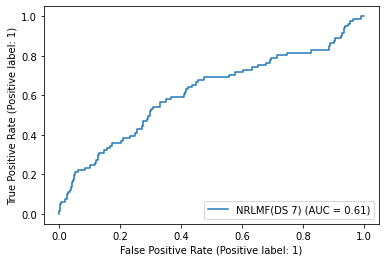

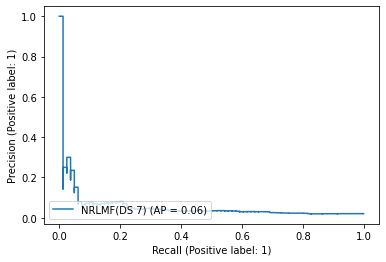

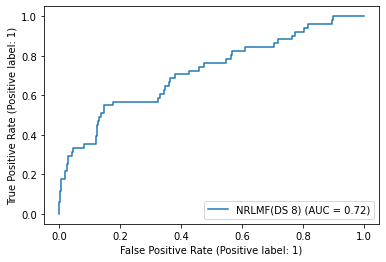

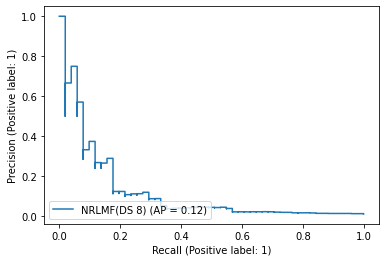

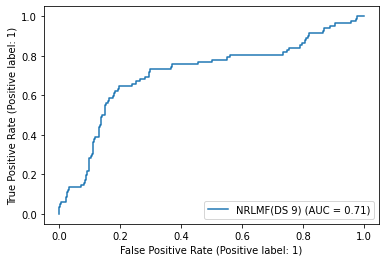

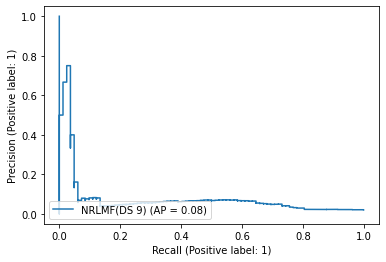

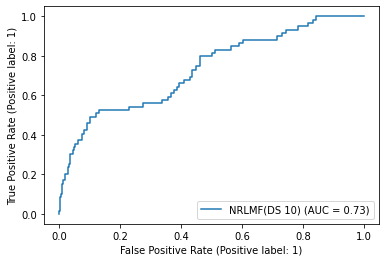

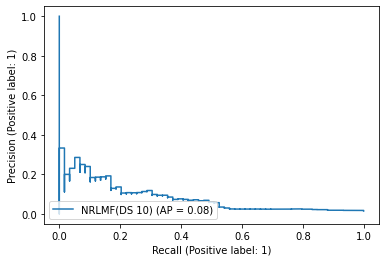

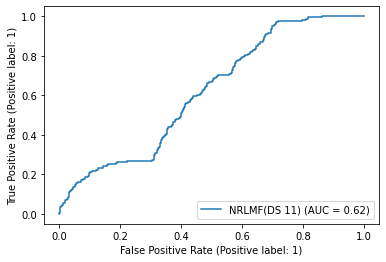

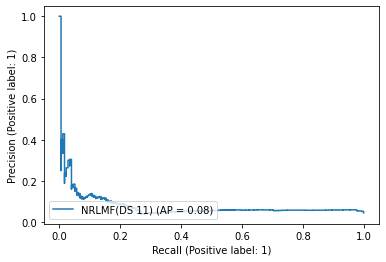

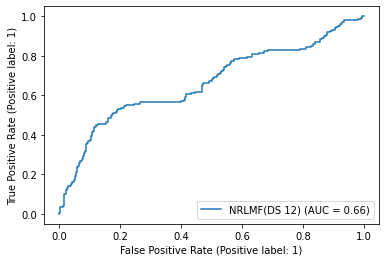

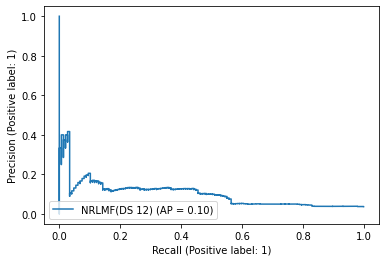

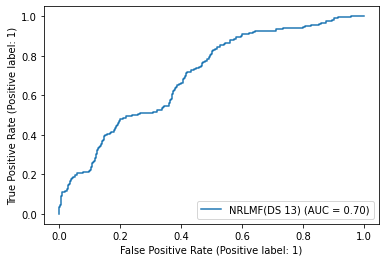

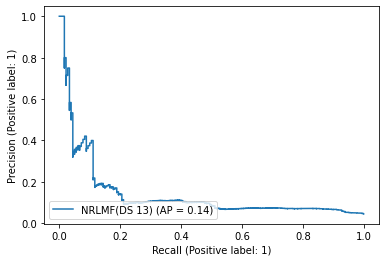

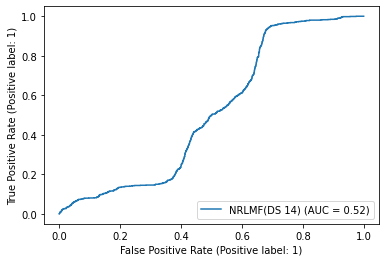

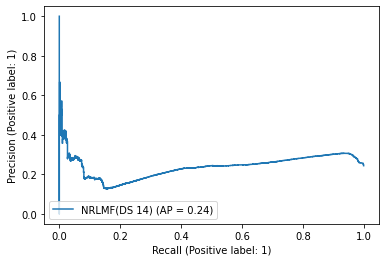

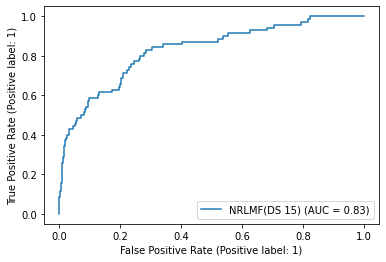

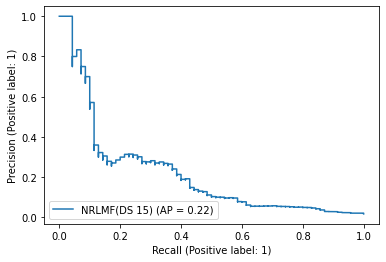

In [5]:
avg_auroc=0
avg_aupr=0
for i in range(16):
    print(f'+++ CVS-2: Dataset-{i} +++')
    neg_prot_set=[j for j in random_grouping[i]]
    print('Negative protein set=',sep=' ')
    print(neg_prot_set)
    y_true=np.empty(0)
    for j in neg_prot_set:
        y_true=np.concatenate((y_true,Y[:,j]))
    modified_Y=Y.copy()
    for j in neg_prot_set:
        for k in range(rna_cnt):
            modified_Y[k][j]=0
    
    U,V=NRLMF.NRLMF(rna_cnt,prot_cnt,Sl,Sp,modified_Y,neg_prot_set=neg_prot_set)
    
    P=NRLMF.prob(U,V)
    y_pred=np.empty(0)
    for j in neg_prot_set:
        y_pred=np.concatenate((y_pred,P[:,j]))
    
    update_metrics(y_true,y_pred,tpr_arr,fpr_arr,pre_arr,i)
    
    auroc=roc_auc_score(y_true, y_pred)
    RocCurveDisplay.from_predictions(y_true,y_pred,name=f'NRLMF(DS {i})')
    print(f'AUROC={auroc}')
    avg_auroc+=auroc
    
    aupr=average_precision_score(y_true,y_pred)
    PrecisionRecallDisplay.from_predictions(y_true,y_pred,name=f'NRLMF(DS {i})')
    print(f'AUPR={aupr}')
    avg_aupr+=aupr

avg_auroc/=16
avg_aupr/=16
print(f'Average AUROC={avg_auroc}')
print(f'Average AUPR={avg_aupr}')

In [6]:
for i in range(len(tpr_arr)):
    tpr_arr[i].reverse()
    fpr_arr[i].reverse()
    pre_arr[i].reverse()

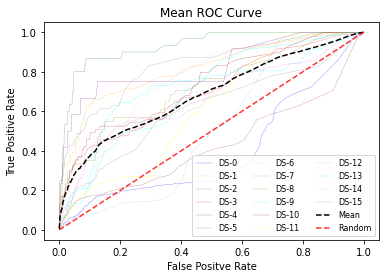

In [16]:
plt.plot(fpr_arr[0],tpr_arr[0],color="blue",linewidth=0.2,label='DS-0')
plt.plot(fpr_arr[1],tpr_arr[1],color="orange",linewidth=0.2,label='DS-1')
plt.plot(fpr_arr[2],tpr_arr[2],color="green",linewidth=0.2,label='DS-2')
plt.plot(fpr_arr[3],tpr_arr[3],color="red",linewidth=0.2,label='DS-3')
plt.plot(fpr_arr[4],tpr_arr[4],color="purple",linewidth=0.2,label='DS-4')
plt.plot(fpr_arr[5],tpr_arr[5],color="brown",linewidth=0.2,label='DS-5')
plt.plot(fpr_arr[6],tpr_arr[6],color="pink",linewidth=0.2,label='DS-6')
plt.plot(fpr_arr[7],tpr_arr[7],color="grey",linewidth=0.2,label='DS-7')
plt.plot(fpr_arr[8],tpr_arr[8],color="olive",linewidth=0.2,label='DS-8')
plt.plot(fpr_arr[9],tpr_arr[9],color="cyan",linewidth=0.2,label='DS-9')
plt.plot(fpr_arr[10],tpr_arr[10],color="maroon",linewidth=0.2,label='DS-10')
plt.plot(fpr_arr[11],tpr_arr[11],color="yellow",linewidth=0.2,label='DS-11')
plt.plot(fpr_arr[12],tpr_arr[12],color="violet",linewidth=0.2,label='DS-12')
plt.plot(fpr_arr[13],tpr_arr[13],color="aqua",linewidth=0.2,label='DS-13')
plt.plot(fpr_arr[14],tpr_arr[14],color="skyblue",linewidth=0.2,label='DS-14')
plt.plot(fpr_arr[15],tpr_arr[15],color="gray",linewidth=0.2,label='DS-15')

mean_x_axis = [i for i in np.linspace(0,1,500)]
ys_interp = [np.interp(mean_x_axis, fpr_arr[i], tpr_arr[i]) for i in range(len(tpr_arr))]
mean_y_axis = np.mean(ys_interp, axis=0)

#print(ys_interp)

plt.plot(mean_x_axis, mean_y_axis, color="black",linestyle='--',label='Mean')
#plt.show()
plt.title("Mean ROC Curve")
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], linestyle='--', color='r',label='Random', alpha=.8)
plt.legend(loc='lower right',ncol=3,prop={'size': 8})
plt.savefig('foobar1.pdf')

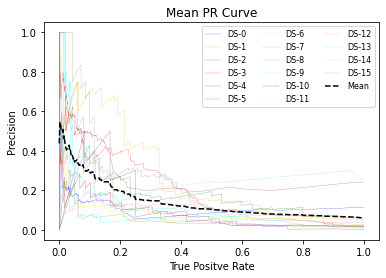

In [21]:
plt.plot(tpr_arr[0],pre_arr[0],color="blue",linewidth=0.2,label='DS-0')
plt.plot(tpr_arr[1],pre_arr[1],color="orange",linewidth=0.2,label='DS-1')
plt.plot(tpr_arr[2],pre_arr[2],color="green",linewidth=0.2,label='DS-2')
plt.plot(tpr_arr[3],pre_arr[3],color="red",linewidth=0.2,label='DS-3')
plt.plot(tpr_arr[4],pre_arr[4],color="purple",linewidth=0.2,label='DS-4')
plt.plot(tpr_arr[5],pre_arr[5],color="brown",linewidth=0.2,label='DS-5')
plt.plot(tpr_arr[6],pre_arr[6],color="pink",linewidth=0.2,label='DS-6')
plt.plot(tpr_arr[7],pre_arr[7],color="grey",linewidth=0.2,label='DS-7')
plt.plot(tpr_arr[8],pre_arr[8],color="olive",linewidth=0.2,label='DS-8')
plt.plot(tpr_arr[9],pre_arr[9],color="cyan",linewidth=0.2,label='DS-9')
plt.plot(tpr_arr[10],pre_arr[10],color="maroon",linewidth=0.2,label='DS-10')
plt.plot(tpr_arr[11],pre_arr[11],color="yellow",linewidth=0.2,label='DS-11')
plt.plot(tpr_arr[12],pre_arr[12],color="violet",linewidth=0.2,label='DS-12')
plt.plot(tpr_arr[13],pre_arr[13],color="aqua",linewidth=0.2,label='DS-13')
plt.plot(tpr_arr[14],pre_arr[14],color="skyblue",linewidth=0.2,label='DS-14')
plt.plot(tpr_arr[15],pre_arr[15],color="gray",linewidth=0.2,label='DS-15')

mean_x_axis = [i for i in np.linspace(0,1,500)]
ys_interp = [np.interp(mean_x_axis, tpr_arr[i], pre_arr[i]) for i in range(len(tpr_arr))]
mean_y_axis = np.mean(ys_interp, axis=0)

#print(ys_interp)

plt.plot(mean_x_axis, mean_y_axis, color="black",linestyle='--',label='Mean')
#plt.show()
plt.title("Mean PR Curve")
plt.xlabel("True Positve Rate")
plt.ylabel("Precision")

plt.legend(loc='upper right',ncol=3,prop={'size': 8})
plt.savefig('foobar2.pdf')

In [9]:
f=open('NRLMF_CVS2_tpr.txt','w')

for lst in tpr_arr:
    for item in lst:
        f.write(str(item)+' ')
    f.write('\n')
    
f.close()

f=open('NRLMF_CVS2_fpr.txt','w')

for lst in fpr_arr:
    for item in lst:
        f.write(str(item)+' ')
    f.write('\n')
    
f.close()

f=open('NRLMF_CVS2_pre.txt','w')

for lst in pre_arr:
    for item in lst:
        f.write(str(item)+' ')
    f.write('\n')
    
f.close()